In [169]:
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
#full station
data = pd.read_csv('/Users/ran/Desktop/traffic/way_station_location.csv')
# location=data[['Lat','Lng']]
# location.to_csv('/Users/ran/Desktop/traffic/location.csv',index=False)
data

,ID,Fwy,Lat,Lng
0,1114091,I5-N,32.542842,-117.030331
1,1118333,I5-N,32.543777,-117.031517
2,1118348,I5-N,32.557644,-117.059898
3,1114720,I5-N,32.561334,-117.067081
4,1118352,I5-N,32.566147,-117.074193
...,...,...,...,...
1373,1123327,I905-W,32.564358,-116.964767
1374,1123261,I905-W,32.564112,-116.950744
1375,1122411,I905-W,32.558222,-116.942610
1376,1122412,I905-W,32.558222,-116.942610


In [171]:
#small scale station
margin = [[32.6305,-117.503],[32.9969,-116.9321]]
data = data[(data['Lat']>margin[0][0]) & (data['Lat']<margin[1][0]) & (data['Lng']>margin[0][1]) & (data['Lng']<margin[1][1])]
# data.to_csv('/Users/ran/Desktop/traffic/way_station_location_small_scale.csv',index=False)
data = pd.read_csv('/Users/ran/Desktop/traffic/way_station_location_small_scale.csv')
data


,ID,Fwy,Lat,Lng
0,1118735,I5-N,32.630551,-117.096241
1,1118450,I5-N,32.640259,-117.100052
2,1114190,I5-N,32.658963,-117.107386
3,1123331,I5-N,32.670525,-117.111203
4,1118479,I5-N,32.673051,-117.110394
...,...,...,...,...
903,1125772,I805-S,32.891018,-117.207135
904,1125775,I805-S,32.891018,-117.207135
905,1125769,I805-S,32.891018,-117.207135
906,1126534,I805-S,32.889118,-117.204938


In [172]:
data.groupby('Fwy').count()

,ID,Lat,Lng
Fwy,,,
I15-N,82,82,82
I15-S,77,77,77
I5-N,91,91,91
I5-S,87,87,87
I8-E,49,49,49
I8-W,57,57,57
I805-N,83,83,83
I805-S,93,93,93
SR125-N,29,29,29


In [173]:
#画openstreetmap点
# way_node_location = pd.read_csv('/Users/ran/Desktop/traffic/way_node_location.csv')
# way_node_location

In [174]:
# inter_section = pd.DataFrame(node_list,columns=['Lat','Lng'])
# inter_section.to_csv('/Users/ran/Desktop/traffic/inter_section_location.csv',index=False)
inter_section=pd.read_csv('/Users/ran/Desktop/traffic/inter_section_location.csv')
inter_section

,Lat,Lng
0,32.9325,-117.2412
1,32.9647,-117.0954
2,32.9051,-117.2246
3,32.8381,-117.2347
4,32.8470,-117.1779
5,32.8411,-117.1333
6,32.8416,-117.1204
7,32.8565,-117.1147
8,32.8093,-117.1528
9,32.8361,-117.0037


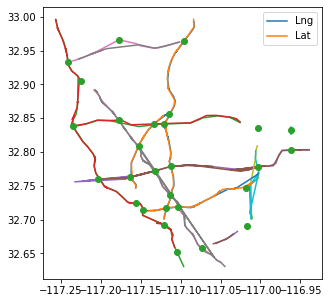

In [175]:
plt.figure(figsize=(5,5))

# groups = way_node_location.groupby('way_id')
# for group_name,group_data in groups:
#     x=group_data.loc[:,'lon']
#     y=group_data.loc[:,'lat']
#     plt.plot(x,y,'o')

groups = data.groupby('Fwy')
for group_name,group_data in groups:
    x=group_data.loc[:,'Lng']
    y=group_data.loc[:,'Lat']
    plt.plot(x,y,'-')

plt.plot(inter_section.loc[:,'Lng'],inter_section.loc[:,'Lat'],'o')
    
label = ['Lng', 'Lat']
plt.legend(label, loc='upper right')
plt.savefig('/Users/ran/Desktop/traffic/station_location.jpg')